# Lending Club Case Study

# Group Members:
1)Mihir Pawar
2)Bharadwaj Mokshagundam

Importing required Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# pd.options.display.max_rows = 40000
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Loading the dataset

In [60]:
data=pd.read_csv('loan.csv')

C:\Users\Mihir\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [61]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Dimensions

Check the dimensions of dataframe

In [62]:
data.shape

(39717, 111)

In [63]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [64]:
data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [65]:
data.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   

In [66]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


# Checking for missing values

Check for missing values and displaying only columns with missing values in descending order

In [67]:
null=data.loc[:, data.isna().any()].isnull().sum().sort_values(ascending=False)

Dropping columns with all rows blank

In [68]:
data.drop(columns=list(null[null.values == data.shape[0]].index), inplace=True)
data.shape

(39717, 57)

In [69]:
data.loc[:,data.isna().any()].isnull().sum().sort_values(ascending=False)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
dtype: int64

In [70]:
data.shape

(39717, 57)

drop the columns 'next_pymnt_d','mths_since_last_record','mths_since_last_delinq' as they contain many missing values.
drop desc column as it wont help in analysing data.

In [71]:
data.drop(data[['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc']],axis=1,inplace=True)

In [72]:
data.shape

(39717, 53)

# Checking for missing values and dropping the rows with missing values to make it a complete dataset.

In [73]:
data.loc[:, data.isna().any()].isnull().sum().sort_values(ascending=False)

emp_title                     2459
emp_length                    1075
pub_rec_bankruptcies           697
last_pymnt_d                    71
chargeoff_within_12_mths        56
collections_12_mths_ex_med      56
revol_util                      50
tax_liens                       39
title                           11
last_credit_pull_d               2
dtype: int64

In [74]:
data.dropna(axis=0,inplace=True)

In [75]:
data.shape

(36431, 53)

# Removing Columns with unique value 1 as they dont have rich information

In [76]:
unique_vals=data.nunique()

In [77]:
unique_vals=unique_vals[unique_vals.values == 1]

In [78]:
data.drop(columns=list(unique_vals[unique_vals.values == 1].index), inplace=True)

In [79]:
data.shape

(36431, 44)

# Some columns have too many unique values, so deleting those columns

In [80]:
many_unique_vals = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]


In [81]:
data.drop(columns=many_unique_vals, inplace=True)
data.shape

(36431, 28)

# In our case, we only need "Fully Paid" and "Charged Off" for analysis becaue "Current" loan status means still in process.

In [82]:
data['loan_status'].value_counts()

Fully Paid     30423
Charged Off     4942
Current         1066
Name: loan_status, dtype: int64

In [83]:
data = data[(data['loan_status'] != 'Current')]

In [84]:
data.shape

(35365, 28)

In [85]:
data.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

# Converting interest rate from object to float dtype

In [86]:
data['int_rate'] = data['int_rate'].str.rstrip('%')

C:\Users\Mihir\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
data['int_rate']=data['int_rate'].astype(float)

C:\Users\Mihir\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
data['int_rate'].value_counts()

10.99    862
11.49    735
7.51     731
13.49    709
7.88     674
        ... 
12.36      1
16.33      1
9.51       1
18.72      1
16.96      1
Name: int_rate, Length: 333, dtype: int64

In [89]:
data['int_rate'].describe()

count    35365.000000
mean        11.983494
std          3.702615
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

# Converting revol_util from objedt to float

In [90]:
data['revol_util'] = pd.Series(data['revol_util']).str.replace('%', '').astype(float)

C:\Users\Mihir\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
data['revol_util'].describe()

count    35365.000000
mean        49.138820
std         28.228489
min          0.000000
25%         25.900000
50%         49.700000
75%         72.600000
max         99.900000
Name: revol_util, dtype: float64

# Derived Metrics

# Extracting Year, Month, Day of week, thus creating Derived Columns from issue_d

In [92]:
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%y')

C:\Users\Mihir\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
data['issue_year']=data['issue_d'].dt.year

C:\Users\Mihir\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [94]:
data['issue_month']=data['issue_d'].dt.month_name(locale='English')

C:\Users\Mihir\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [95]:
data['issue_day_name']=data['issue_d'].dt.day_name()

C:\Users\Mihir\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_year,issue_month,issue_day_name
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,5,3,0,1687,9.4,4,0.0,2011,December,Thursday
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,1,10,0,5598,21.0,37,0.0,2011,December,Thursday
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,3,9,0,7963,28.3,12,0.0,2011,December,Thursday
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,...,1,7,0,17726,85.6,11,0.0,2011,December,Thursday
7,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,...,2,4,0,8221,87.5,4,0.0,2011,December,Thursday


# Exploratory Data Analysis

# Interest Rate

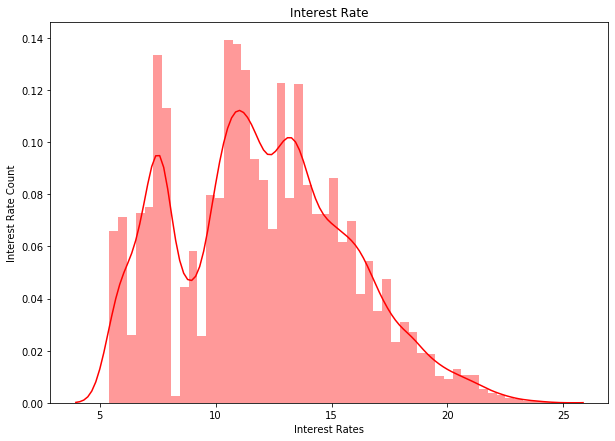

In [97]:
plt.figure(figsize=(10,7)) #dedfine the dimension of image
sns.distplot(data['int_rate'],color='red')
plt.title('Interest Rate')
plt.ylabel('Interest Rate Count')
plt.xlabel('Interest Rates')
#plt.savefig(r"C:\Users\Mihir\Desktop\PG ML AL IIITB\Bank Lending Case Study\Plots\Interest Rate Distribution Plot.jpg")
plt.show()

Observations-Average interest rate is between 10-15 percent

# Loan Status

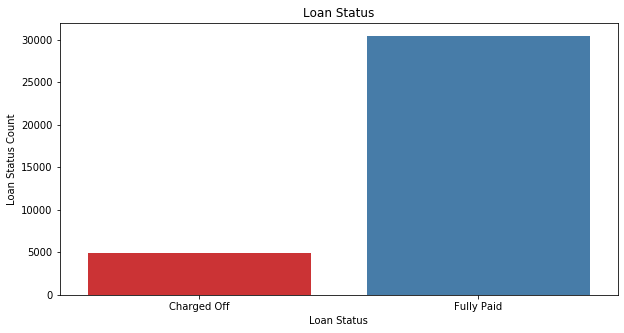

In [98]:
plt.figure(figsize=(10,5)) #dedfine the dimension of image
sns.countplot(x='loan_status',data=data,palette='Set1')
plt.title('Loan Status')
plt.ylabel('Loan Status Count')
plt.xlabel('Loan Status')
#plt.savefig(r"C:\Users\Mihir\Desktop\PG ML AL IIITB\Bank Lending Case Study\Plots\Loan Status Countplot.jpg")
plt.xticks(rotation=0)
plt.show()

Observations-About 86% applicants loan is fully paid.

# Issue Day of week

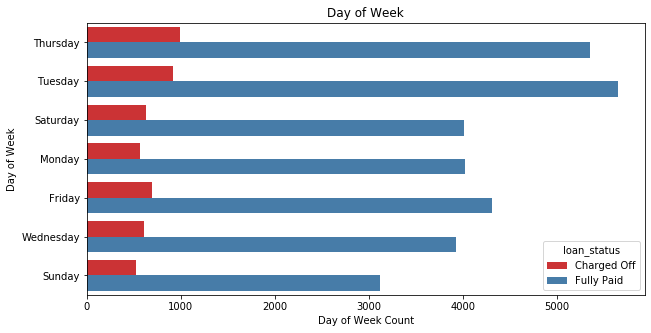

In [99]:
# Day of week Countplot

plt.figure(figsize=(10,5)) #dedfine the dimension of image
sns.countplot(y='issue_day_name',data=data,palette='Set1',hue='loan_status')
plt.title('Day of Week')
plt.ylabel('Day of Week')
plt.xlabel('Day of Week Count')
#plt.savefig(r"C:\Users\Mihir\Desktop\PG ML AL IIITB\Bank Lending Case Study\Plots\day_name Countplot.jpg")
plt.xticks(rotation=0)
plt.show()

Observations-It can be seen that on Tuesdays, most of the loans are been issued.

# Issue Month

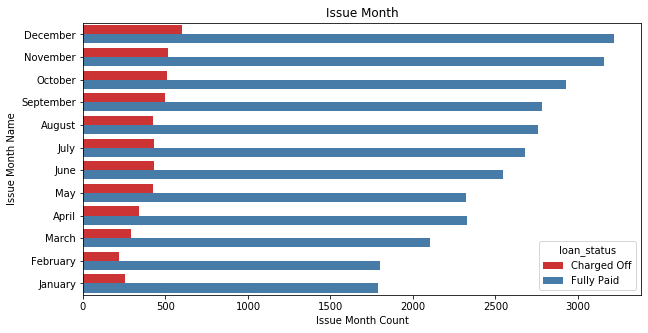

In [100]:
plt.figure(figsize=(10,5)) #dedfine the dimension of image
sns.countplot(y='issue_month',data=data,palette='Set1',hue='loan_status')
plt.title('Issue Month')
plt.ylabel('Issue Month Name')
plt.xlabel('Issue Month Count')
#plt.savefig(r"C:\Users\Mihir\Desktop\PG ML AL IIITB\Bank Lending Case Study\Plots\issue_month Countplot.jpg")
plt.xticks(rotation=0)
plt.show()

Observation-Most of loans are issued in the month of December, followed by November

# Issue Year

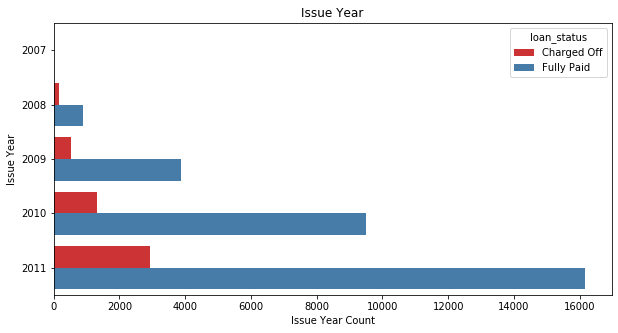

In [101]:
plt.figure(figsize=(10,5)) #dedfine the dimension of image
sns.countplot(y='issue_year',data=data,palette='Set1',hue='loan_status')
plt.title('Issue Year')
plt.ylabel('Issue Year')
plt.xlabel('Issue Year Count')
#plt.savefig(r"C:\Users\Mihir\Desktop\PG ML AL IIITB\Bank Lending Case Study\Plots\issue_year Countplot.jpg")
plt.show()

Observations-
Most of the loans were issued in the year 2011, followed by 2010.

# Employment Tenure

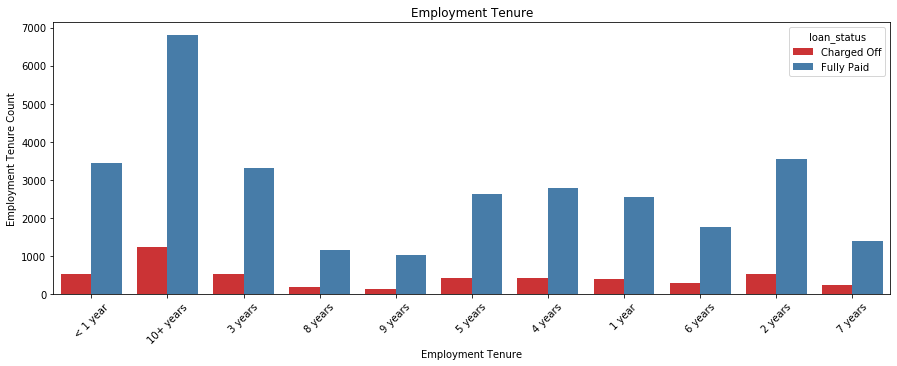

In [102]:
plt.figure(figsize=(15,5))
sns.countplot(x='emp_length',data=data,hue='loan_status',palette='Set1')
plt.title('Employment Tenure')
plt.xlabel('Employment Tenure')
plt.ylabel('Employment Tenure Count')
#plt.savefig(r"C:\Users\Mihir\Desktop\PG ML AL IIITB\Bank Lending Case Study\Plots\Employment Tenure.jpg")
plt.xticks(rotation=45)
plt.show()

Observations-If we observe the above graph, the people with 10+ years of Experience has successfully paid the the complete loan.Also, the people with 9 years of experience failed to pay the loan(Charged-off)

# Application type

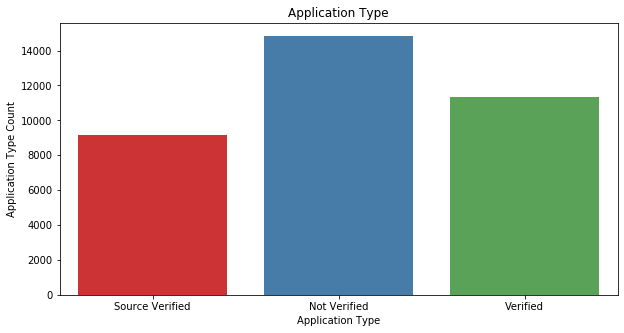

In [103]:
plt.figure(figsize=(10,5))
sns.countplot(x='verification_status',data=data,palette='Set1')
plt.title('Application Type')
plt.xlabel('Application Type')
plt.ylabel('Application Type Count')
#plt.savefig(r"C:\Users\Mihir\Desktop\PG ML AL IIITB\Bank Lending Case Study\Plots\Application Type.jpg")
plt.xticks(rotation=0)
plt.show()

Observations-Verification status indicates if income was verified by LC, not verified, or if the income source was verified.
As we can see above, Most of the applicant's income was not verified by the bank.

# Loan Amount

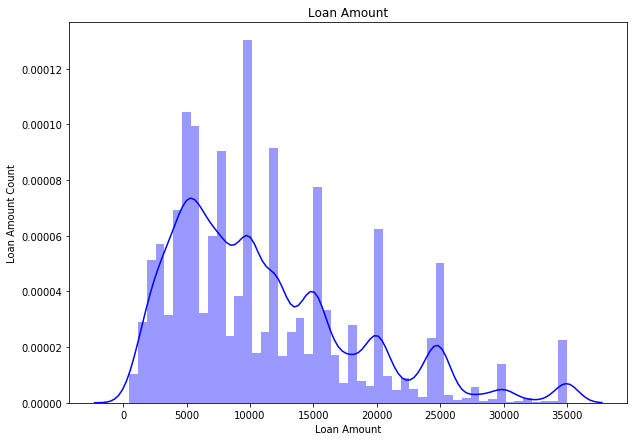

In [104]:
plt.figure(figsize=(10,7)) #dedfine the dimension of image
sns.distplot(data['loan_amnt'],color='blue')
plt.title('Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Amount Count')
#plt.savefig(r"C:\Users\Mihir\Desktop\PG ML AL IIITB\Bank Lending Case Study\Plots\Loan Amount.jpg")
plt.show()

Observations-Most of the applicants have requested a loan amount of 5000. Also we can observe that the graph is left-skewed with less amount of loan amounts.

# Address State

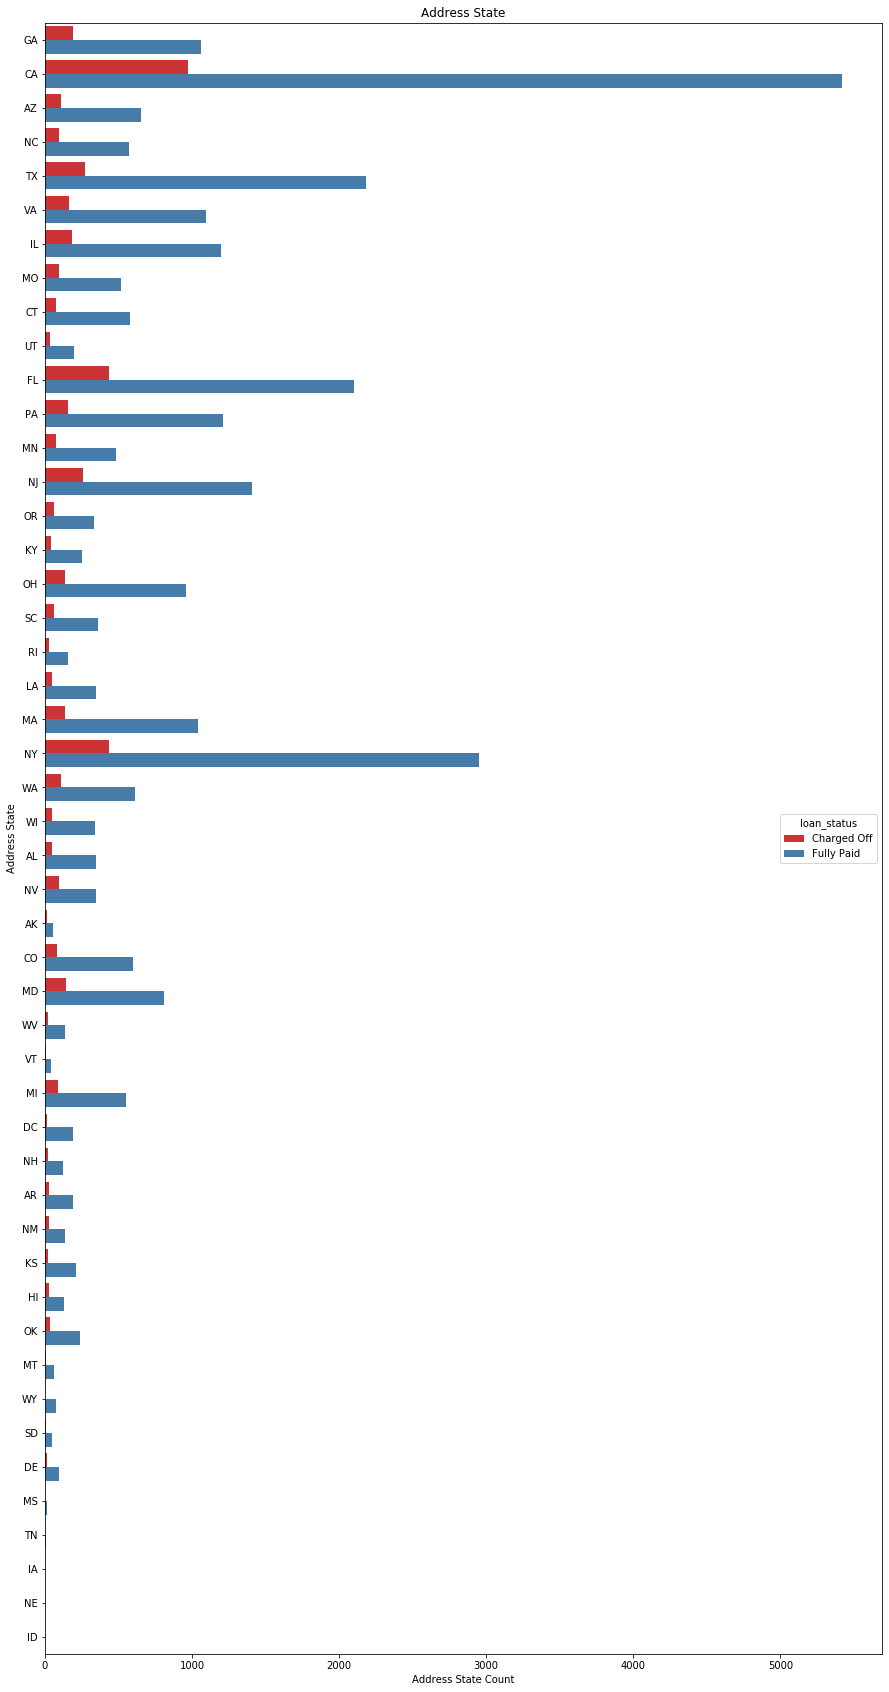

In [105]:
plt.figure(figsize=(15,30))
sns.countplot(y='addr_state',data=data,hue='loan_status',palette='Set1')
plt.title('Address State')
plt.xlabel('Address State Count')
plt.ylabel('Address State')
#plt.savefig(r"C:\Users\Mihir\Desktop\PG ML AL IIITB\Bank Lending Case Study\Plots\Address State.jpg")
plt.show()

Observations-From the above table we can see that the some of the risky states are NE, NV, SD, AK, FL, MO

# Grades

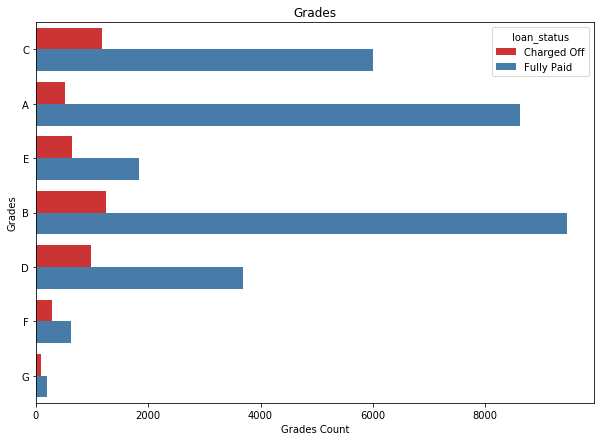

In [106]:
plt.figure(figsize=(10,7)) #dedfine the dimension of image
sns.countplot(y='grade',data=data,hue='loan_status',palette='Set1')
plt.title('Grades')
plt.xlabel('Grades Count')
plt.ylabel('Grades')
#plt.savefig(r"C:\Users\Mihir\Desktop\PG ML AL IIITB\Bank Lending Case Study\Plots\Grades.jpg")
plt.show()

Observation-G, F, E and D grades have higher risk of loan defaulters

# Sub Grades

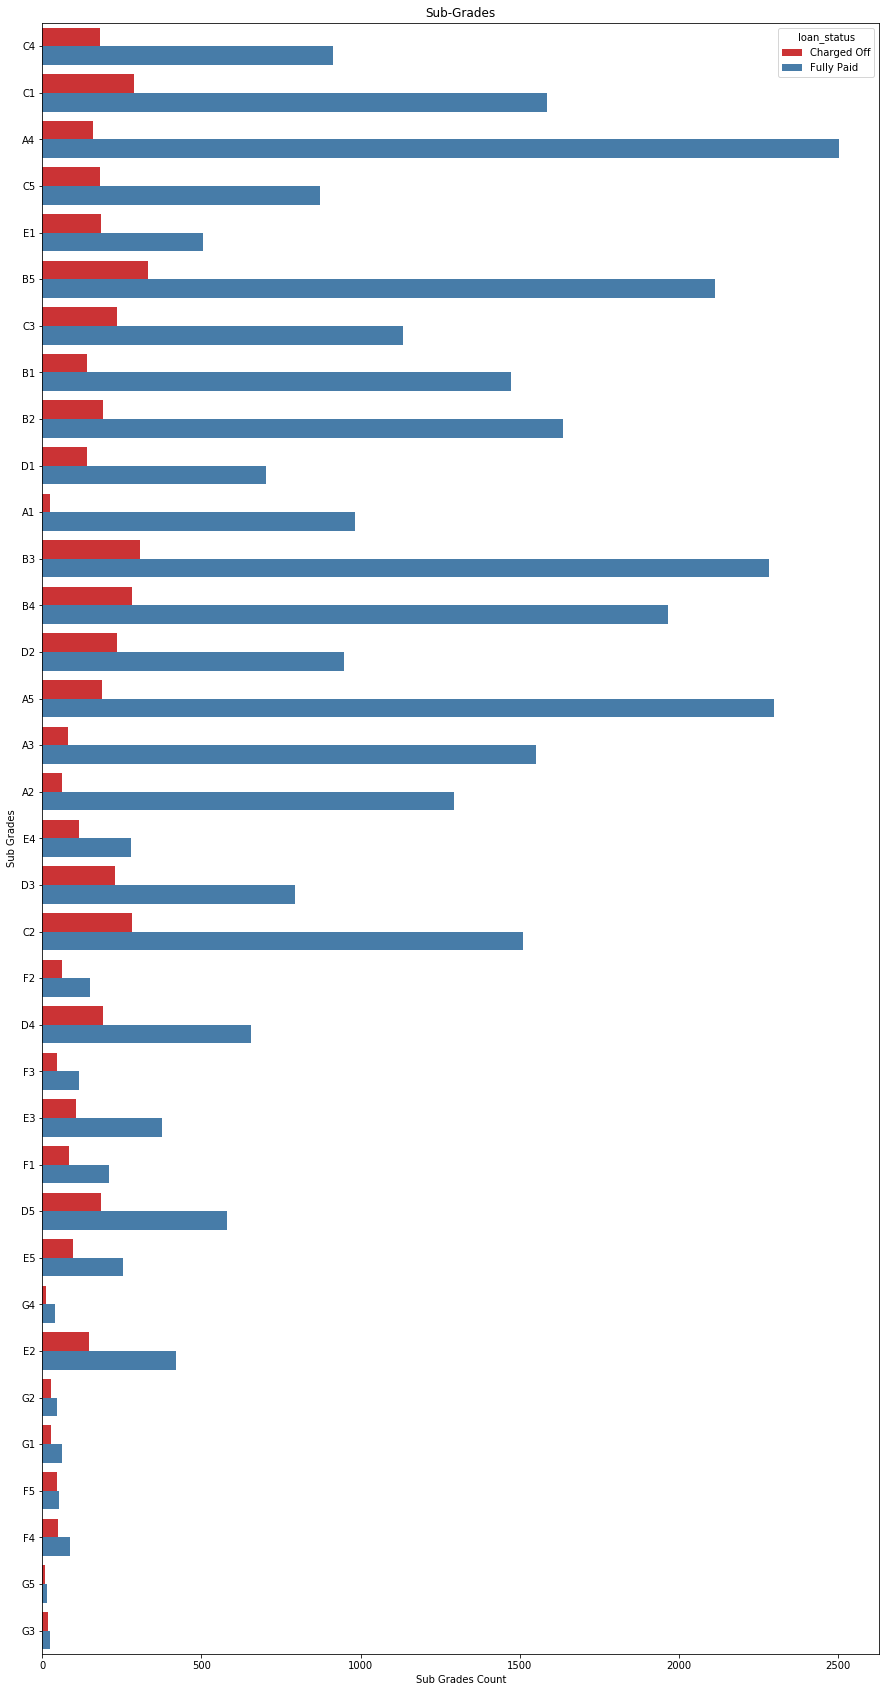

In [107]:
plt.figure(figsize=(15,30)) #dedfine the dimension of image
sns.countplot(y='sub_grade',data=data,hue='loan_status',palette='Set1')
plt.title('Sub Grades')
plt.xlabel('Sub Grades Count')
plt.ylabel('Sub Grades')
#plt.savefig(r"C:\Users\Mihir\Desktop\PG ML AL IIITB\Bank Lending Case Study\Plots\sub_grade.jpg")
plt.title('Sub-Grades')
plt.show()

# Term

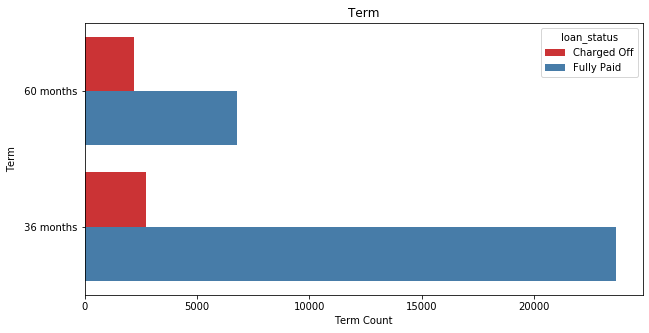

In [108]:
plt.figure(figsize=(10,5)) #dedfine the dimension of image
sns.countplot(y='term',data=data,hue='loan_status',palette='Set1')
plt.title('Term')
plt.xlabel('Term Count')
plt.ylabel('Term')
#plt.savefig(r"C:\Users\Mihir\Desktop\PG ML AL IIITB\Bank Lending Case Study\Plots\Term.jpg")
plt.show()

Observations-Basically it can be observed from the above graph that short term loans(36 months) were fully paid as compared to long term loans

# Home Ownership

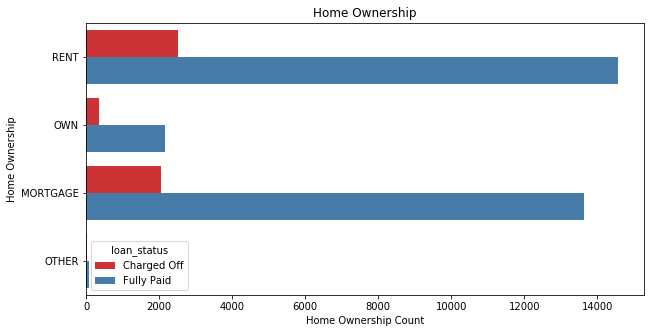

In [109]:
plt.figure(figsize=(10,5)) #dedfine the dimension of image
sns.countplot(y='home_ownership',data=data,hue='loan_status',palette='Set1')
plt.title('Home Ownership')
plt.xlabel('Home Ownership Count')
plt.ylabel('Home Ownership')
#plt.savefig(r"C:\Users\Mihir\Desktop\PG ML AL IIITB\Bank Lending Case Study\Plots\home_ownership.jpg")
plt.show()

Observation-As the data contains "Other" as a category in it, the analysis cant be concluded for this column.

# Purpose

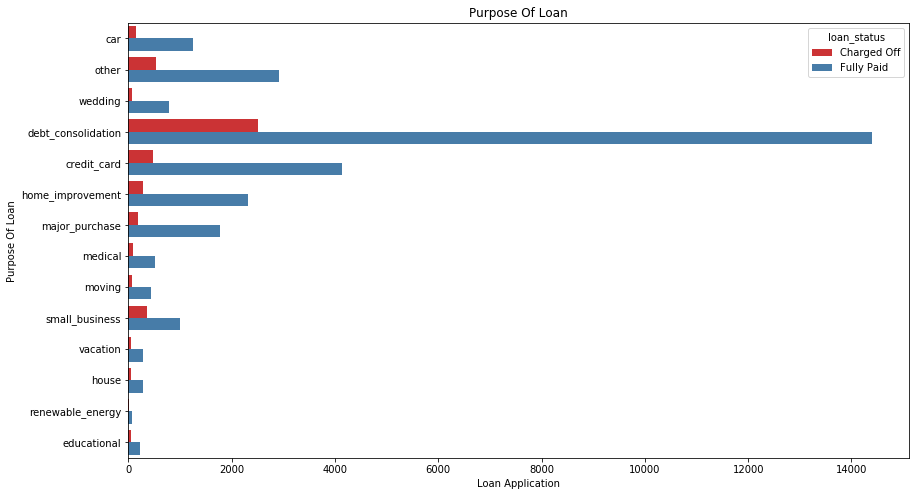

In [110]:
plt.figure(figsize=(14,8))
sns.countplot(y="purpose",data=data,hue='loan_status',palette='Set1')
plt.title('Purpose Of Loan')
plt.ylabel('Purpose Of Loan')
plt.xlabel('Loan Application')
#plt.savefig(r"C:\Users\Mihir\Desktop\PG ML AL IIITB\Bank Lending Case Study\Plots\Purpose Of Loan vs Loan Application Count.jpg")
plt.show()

Observations-loans taken for small_business, renewable_energy and educational have risk than others.

# Public Record

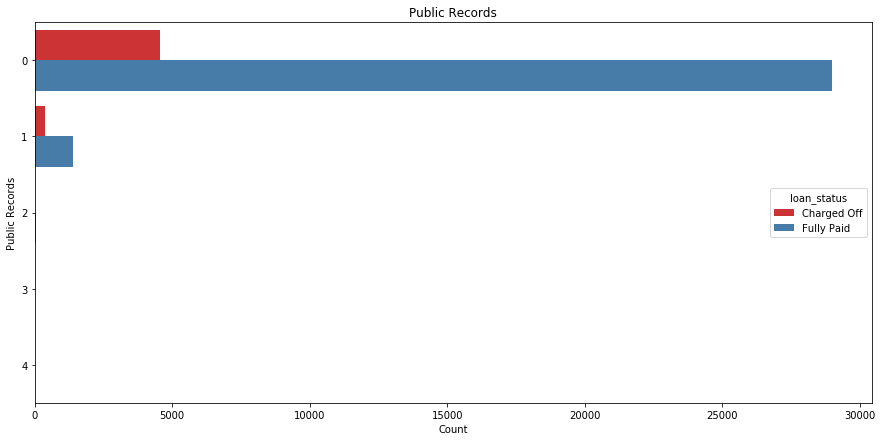

In [111]:
plt.figure(figsize=(15,7)) #dedfine the dimension of image
sns.countplot(y='pub_rec',data=data,hue='loan_status',palette='Set1')
plt.title('Public Records')
plt.ylabel('Public Records')
plt.xlabel('Count')
#plt.savefig(r"C:\Users\Mihir\Desktop\PG ML AL IIITB\Bank Lending Case Study\Plots\public_records.jpg")
plt.show()

Observation- Applicants with non-zero derogatory public records have higher chances of charged off

# term_months vs purpose

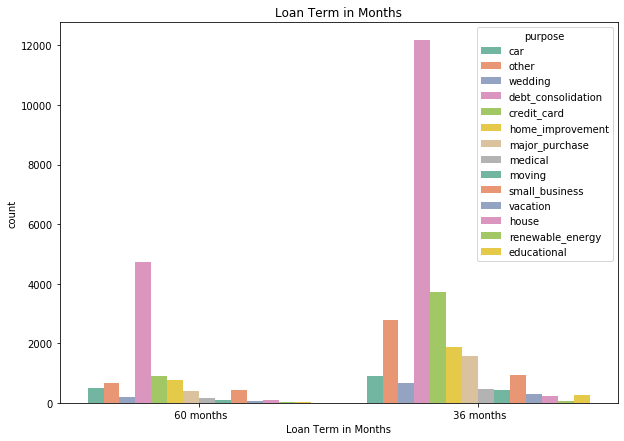

In [112]:
plt.figure(figsize=(10,7))
sns.countplot( x="term", hue='purpose', data=data,palette='Set2')
plt.xlabel('Loan Term in Months')
plt.title('Loan Term in Months')
#plt.savefig(r"C:\Users\Mihir\Desktop\PG ML AL IIITB\Bank Lending Case Study\Plots\Loan Term in Months.jpg")
plt.show()

Tenure of 36 months have high chances to be defaulters

# Bivariate Analysis

# Purpose of Loan vs Loan Amount

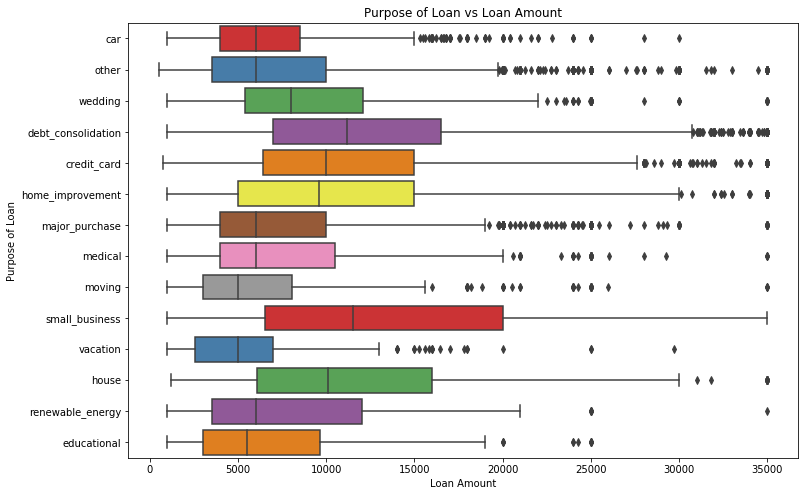

In [113]:
plt.figure(figsize=(12,8))
sns.boxplot(y='purpose', x='loan_amnt', data =data,palette='Set1')
plt.title('Purpose of Loan vs Loan Amount')
plt.ylabel('Purpose of Loan')
plt.xlabel('Loan Amount')
#plt.savefig(r"C:\Users\Mihir\Desktop\PG ML AL IIITB\Bank Lending Case Study\Plots\Purpose of Loan vs Loan Amount.jpg")
plt.show()

Loans taken for “small_business”,” renewable_energy” and “educational” have risk than others.
Loans taken for “small_business” has a large variance as compared to others, while lowest variance is for “vacation”.


# Interest Rate vs grade

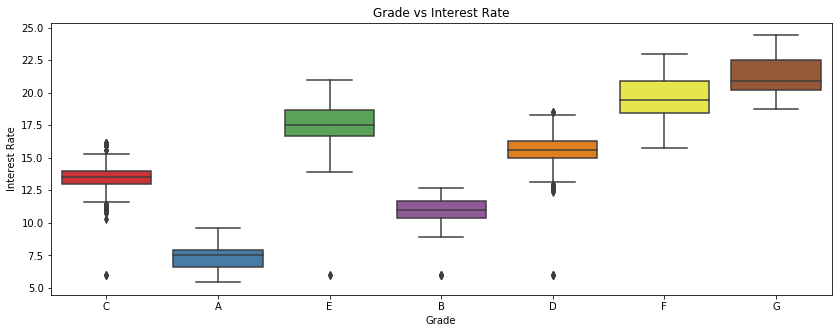

In [114]:
plt.figure(figsize=(14,5))
sns.boxplot(y='int_rate', x='grade', data = data, palette='Set1')
plt.title('Grade vs Interest Rate')
plt.ylabel('Interest Rate')
plt.xlabel('Grade')
#plt.savefig(r"C:\Users\Mihir\Desktop\PG ML AL IIITB\Bank Lending Case Study\Plots\Grade vs Interest Rate.jpg")
plt.show()

Observations:-
The Loans with grades G,F has higher interest rates as compared to Grade A which has lowest Interest Rate

# Annual Income vs pub_rec_bankruptcies

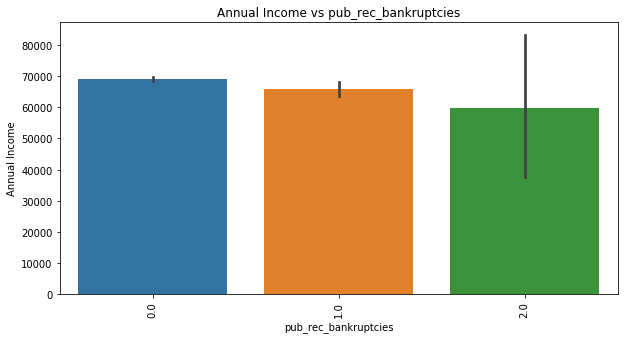

In [115]:
plt.figure(figsize=(10,5))
sns.barplot(y='annual_inc', x='pub_rec_bankruptcies', data=data)
plt.xticks(rotation=90)
plt.title('Annual Income vs pub_rec_bankruptcies')
plt.ylabel('Annual Income')
plt.xlabel('pub_rec_bankruptcies')
#plt.savefig(r"C:\Users\Mihir\Desktop\PG ML AL IIITB\Bank Lending Case Study\Plots\Annual Income vs pub_rec_bankruptcies.jpg")
plt.show()

# Heatmap

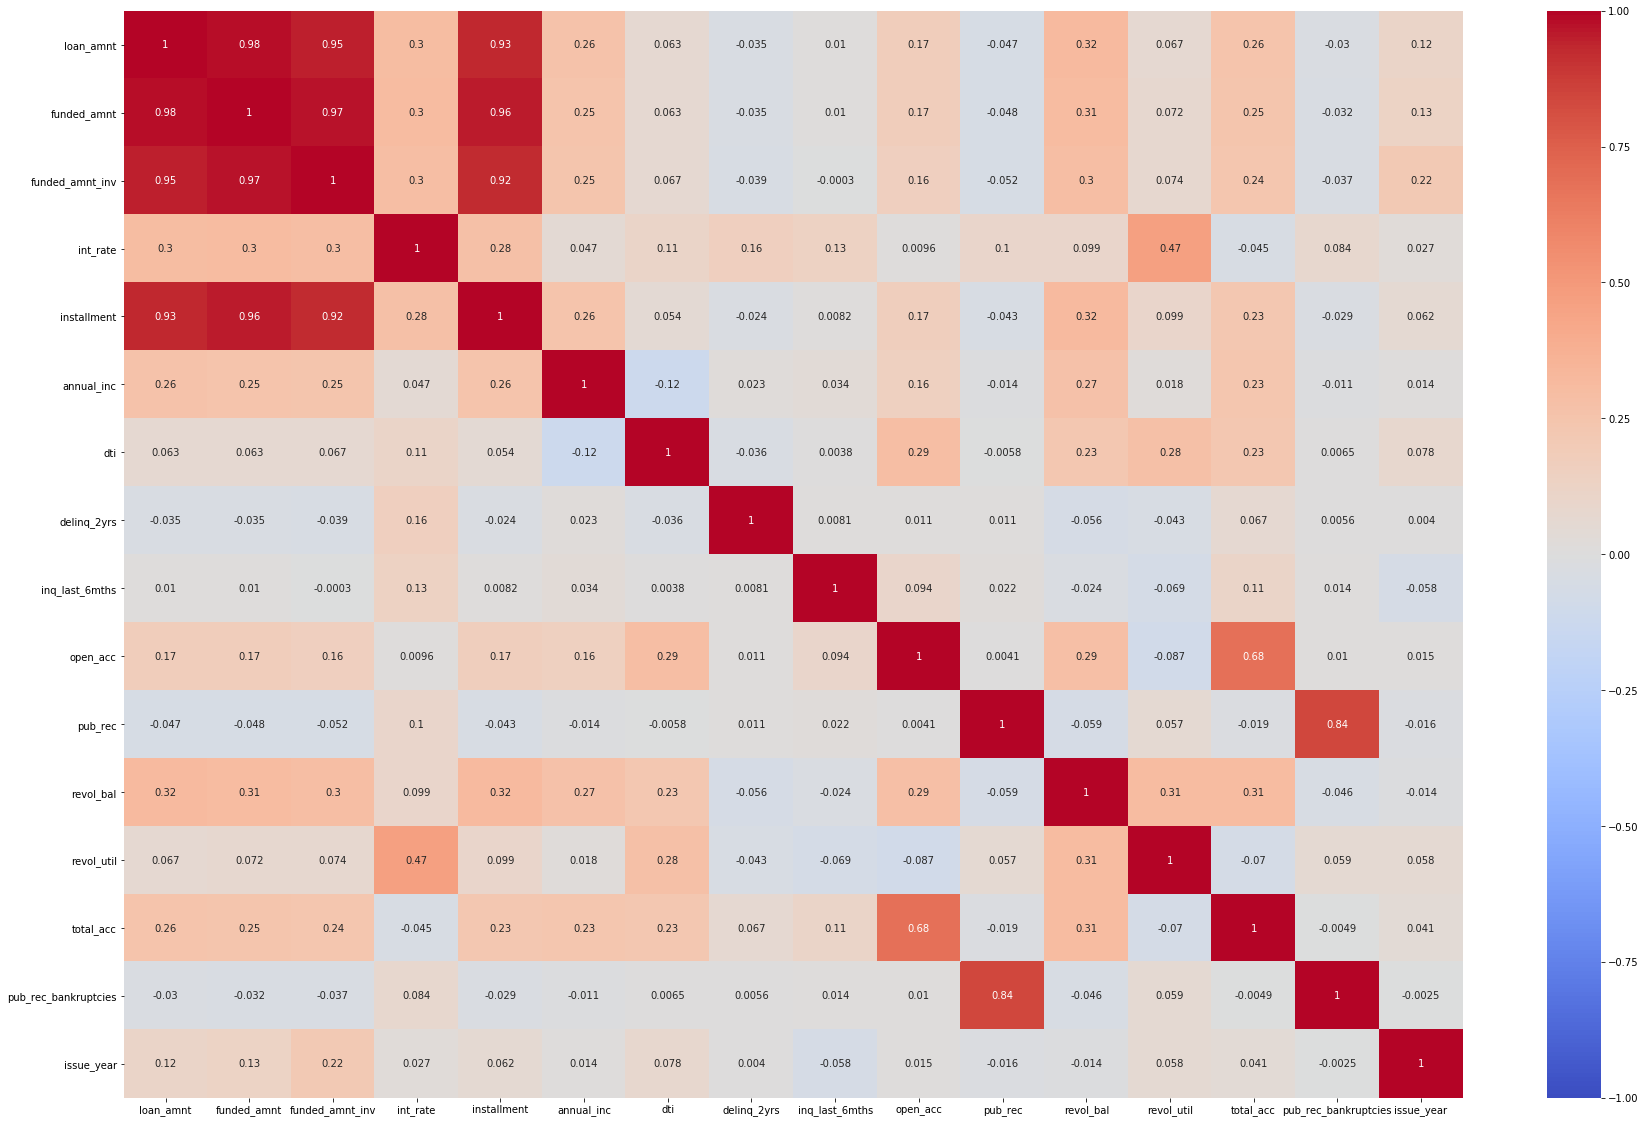

In [116]:
plt.figure(figsize=(30,20)) #dedfine the dimension of image
corr_df=data.corr(method="pearson")
# print(corr_df)
 
sns.heatmap(corr_df,cmap='coolwarm',vmax=1.0,vmin=-1.0,annot=True)
#plt.savefig(r"C:\Users\Mihir\Desktop\PG ML AL IIITB\Bank Lending Case Study\Plots\Correlation.jpg")
plt.show()

# Observations:-
The columns mentioned below are highly positively correlated. 
1)loan_amnt-funded_amnt
2)loan_amnt-funded_amnt_inv
3)funded_amnt-funded_amnt_inv
4)installment-loan_amnt
5)installment-funded_amnt
6)installment-funded_amnt_inv
7)pub_rec-pub_rec_bankruptcies